In [1]:
import pandas as pd
import os
import upsetplot

In [2]:
data_folder = "data"
processed_data_folder = "processed"
processed_data_path = os.path.join(data_folder, processed_data_folder)

In [3]:
data = pd.read_excel(os.path.join(data_folder, "43018_2023_697_MOESM3_ESM.xlsx"))
print("data", data.shape)
data.head()

data (74, 6361)


,Biobank_Number,clinical_Age_at_Diagnosis,clinical_Height,clinical_Weight,clinical_Chemotherapy_Binary,clinical_BMI,clinical_TNM_Mixed_Substage,clinical_Sex_ord,clinical_Site_-_Primary_ICD-O-3_ord,clinical_Histology_Behavior_ICD-O-3_ord,...,pathology_NF4_50%,pathology_NF63_max,pathology_NF49_50%,pathology_NF32_0.95,pathology_NF15_0.1,pathology_NF26_0.1,pathology_NF6_25%,pathology_NF28_0.1,pathology_NF5_50%,pathology_NF3_mean
0,GI-19-025,92,70,168,0,24.102857,1,0,0,85003,...,0.806650,361.342423,0.254049,0.023666,29.383830,0.948465,383.0,848.719310,0.591029,25.556694
1,GI-19-165,78,64,98,1,16.819824,0,1,3,85003,...,0.791039,366.413502,0.249297,0.023437,25.614883,0.945971,384.0,804.064396,0.611766,26.468796
2,GI-17-537,78,64,119,1,20.424072,3,1,3,85003,...,0.703743,407.634914,0.257888,0.024600,32.485244,0.936644,460.0,756.448280,0.710455,28.042728
3,GI-19-002,82,71,258,1,35.979766,3,0,4,85003,...,0.791136,315.220854,0.260066,0.018552,33.917936,0.942633,390.0,898.706989,0.611640,25.718516
4,GI-16-575,66,67,147,1,23.020940,3,0,0,85003,...,0.781992,450.018046,0.259194,0.019614,33.828096,0.943830,387.0,842.917498,0.623288,25.909778


In [4]:
features_modality = pd.Series(data.columns.str.split("_").str[0]).value_counts()

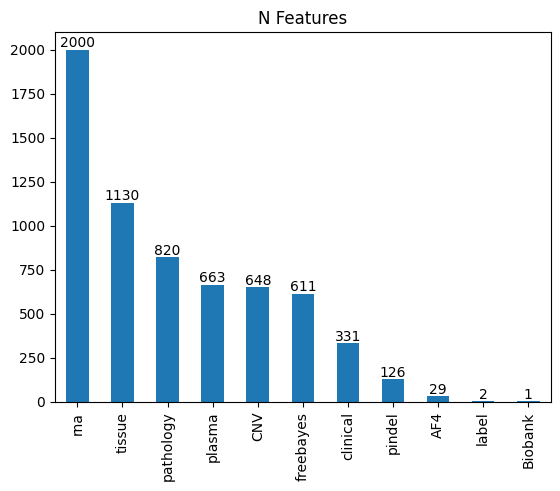

In [5]:
ax = features_modality.plot.bar(title= "N Features")
_ = ax.bar_label(ax.containers[0])

In [6]:
modality_samples = {}
for mod in features_modality[features_modality > 1].index:
    data_modality = data[["Biobank_Number"] + data.columns[data.columns.str.startswith(mod)].to_list()]
    data_modality = data_modality.set_index("Biobank_Number").rename_axis(None, axis=0)
    data_modality = data_modality[~data_modality.isna().all(1)]
    modality_samples[mod] = data_modality
print("data_modality", data.shape)
data_modality.head()

data_modality (74, 6361)


,label_deceased,label_days_to_death
GI-19-025,0,2190
GI-19-165,0,2190
GI-17-537,0,2190
GI-19-002,0,2190
GI-16-575,0,2190


In [7]:
modality_samples["clinical"] = pd.concat([modality_samples["clinical"], modality_samples["label"]], axis= 1)

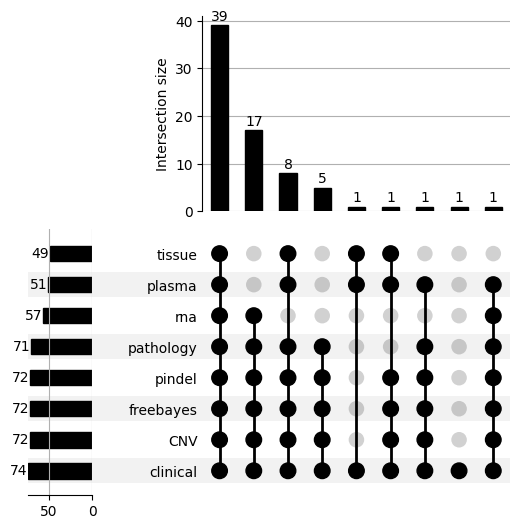

In [8]:
modalities_to_remove = ["AF4", "label"]
dict_data = {key:value.index for key,value in modality_samples.items() if key not in modalities_to_remove}
dict_data = dict(sorted(dict_data.items(), key=lambda item: len(item[1]), reverse=True))
dict_data = upsetplot.from_contents(dict_data)
_ = upsetplot.plot(dict_data, show_counts=True, sort_by= "cardinality")

In [9]:
modalities_to_remove += ["tissue", "plasma"]
dict_data = dict_data.reset_index()
samples = dict_data.loc[
    dict_data["rna"]
    & dict_data["pathology"]
    & dict_data["CNV"]
    & dict_data["freebayes"]
    # & dict_data["pindel"]
]["id"]

for mod in modalities_to_remove:
    del modality_samples[mod]

len(samples)

57

In [10]:
for mod, data_modality in modality_samples.items():
    data_modality.loc[samples].to_csv(os.path.join(processed_data_path, f"{mod}_data.csv"))
print("data_modality", data_modality.loc[samples].shape)
data_modality.loc[samples].head()

data_modality (57, 126)


,pindel_INDEL_STK11,pindel_INDEL_XRCC1,pindel_INDEL_L2HGDH,pindel_INDEL_ETV1,pindel_INDEL_APC,pindel_INDEL_BIRC3,pindel_INDEL_KMT2D,pindel_INDEL_NPM1,pindel_INDEL_VEGFA,pindel_INDEL_CSF1R,...,pindel_INDEL_TAX1BP1,pindel_INDEL_RIMBP2,pindel_INDEL_NOTCH4,pindel_INDEL_WHSC1,pindel_INDEL_STAG2,pindel_INDEL_HEATR1,pindel_INDEL_EWSR1,pindel_INDEL_ARID2,pindel_INDEL_RNF43,pindel_INDEL_EPCAM
GI-19-025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
GI-17-537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GI-19-002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GI-16-575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GI-14-974,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
